In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
# stores the path before read
file_clinicaltrial = 'data/clinicaltrial_data.csv'
file_mousedrug = 'data/mouse_drug_data.csv'

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
trial_df = pd.read_csv(file_clinicaltrial)
# trial_df.head()
# trial_df ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']
drug_df = pd.read_csv(file_mousedrug)
# drug_df.columns ['Mouse ID', 'Drug']

# Combine the data into a single dataset
merge_df = pd.merge(trial_df, drug_df, on = 'Mouse ID', how='outer')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
### Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Data Grouped by Drug and Timepoint (1) stored as a Series
mean_tumor_gb = merge_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()                 
# Convert to DataFrame (2) and reset index per assignment preview
mean_tumor_df = pd.DataFrame({'AvgTumorVol(mm3)':mean_tumor_gb})
mean_tumor_df = mean_tumor_gb.reset_index()
# Preview DataFrame (3)
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sterr_gb = merge_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
# type(sterr_gb) Series here then:
#Convert into dataframe by using reset_index since the indexes will not be columns
sterr_df = sterr_gb.reset_index()
# type(sterr_df) DF here after reset_index()
# # Preview DataFrame
sterr_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
sterr_pdf = sterr_df.pivot(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
sterr_pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


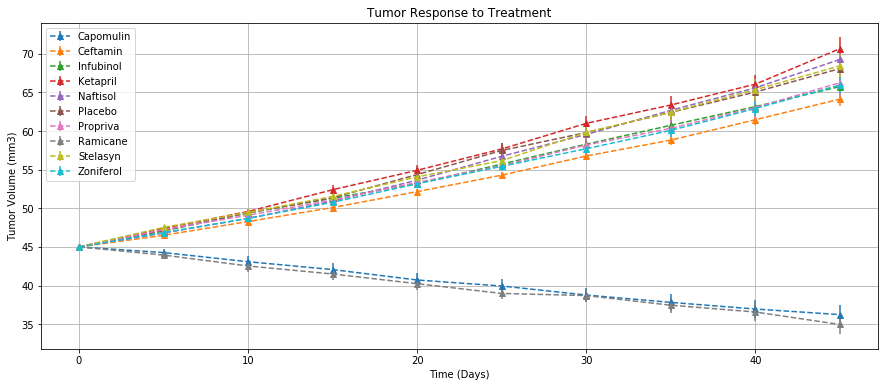

In [6]:
# mean_df should be reformatted per pivot requirements (drugs in each column)
mean_tumor_pdf = mean_tumor_df.pivot(index='Timepoint', columns= 'Drug', values= 'Tumor Volume (mm3)')
# Generate the Plot (with Error Bars)
plt.figure(figsize=(15,6))
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.rcParams["font.size"] = 10
# # create a Series for iteration by the elements of mean_tumor_pdf.columns as below
# drug_index = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drug_index = mean_tumor_pdf.columns

for drug in drug_index:
    plot_drug = plt.errorbar(mean_tumor_pdf.index, mean_tumor_pdf[drug], sterr_pdf[drug], fmt='^', linestyle='--', label=drug)
    plt.legend(loc='best')
    if drug == drug_index[-1]:
        plt.savefig("DrugTumorResponse_vs_Timepoint.png")
plt.show()


In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metsite_gb = merge_df.groupby(['Drug','Timepoint'])
# Convert to DataFrame
# metsite_gb.reset_index() not performed due to assignment requirements where drug/timepoint on index
metsitemean_df = pd.DataFrame(metsite_gb['Metastatic Sites'].mean())
# Preview DataFrame
metsitemean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsite_sterr = metsite_gb['Metastatic Sites'].sem()
# Convert to DataFrame
metsitesterr_df = pd.DataFrame(metsite_sterr)
# Preview DataFrame
metsitesterr_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
metsitemean_pdf = metsitemean_df.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
metsitemean_pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
metsitesterr_pdf = metsitesterr_df.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
metsitesterr_pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


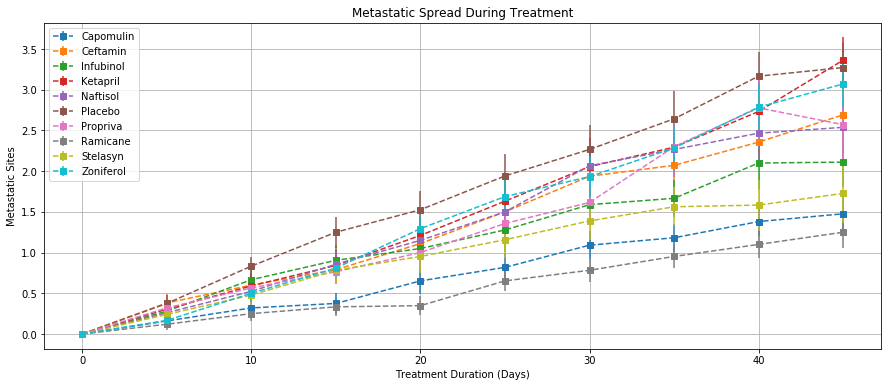

In [11]:
plt.figure(figsize=(15,6))
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.rcParams["font.size"] = 10
# creates a series by the elements of Drug by listing columns
drugmeta_index = metsitemean_pdf.columns

for drug in drugmeta_index:
    plot_drugmeta = plt.errorbar(metsitemean_pdf.index, metsitemean_pdf[drug], metsitesterr_pdf[drug], fmt='s', linestyle='--', label=drug)
    plt.legend(loc='best')
    if drug == drugmeta_index[-1]:
        plt.savefig("DrugMetaStaticSpread_vs_Timepoint.png")
plt.show()

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# stored as series
countmice = merge_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
micecount_df = countmice.reset_index()
# Preview DataFrame
micecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
micecount_pdf=micecount_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
micecount_pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
micerate_pdf = (micecount_pdf/micecount_pdf.iloc[0]).round(0)*100
micerate_pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
10,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
15,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
20,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


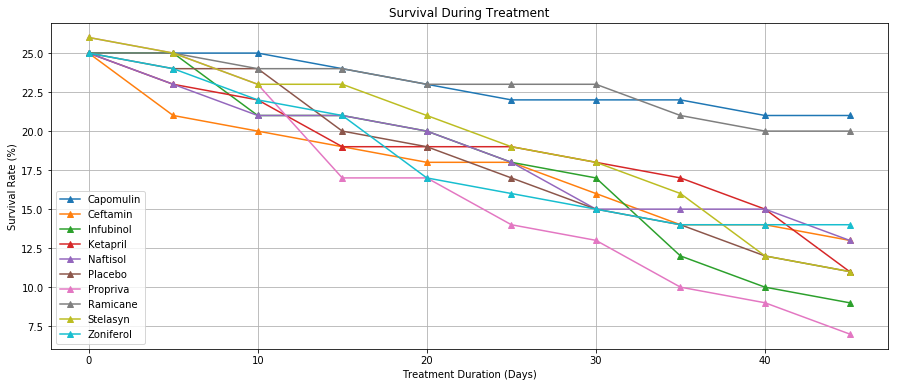

In [15]:
drugmicerate_index =micerate_pdf.columns
plt.figure(figsize=(15,6))
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.rcParams["font.size"] = 10

for drug in drugmicerate_index:
    plot_drugsurvivalrate=plt.plot(micerate_pdf.index, micecount_pdf[drug], linestyle='-', marker='^', label= drug)
    plt.legend(loc='best')
    if drug == drugmicerate_index[-1]:
        plt.savefig("DrugMiceSurvivalRate_vs_Timepoint.png")
plt.show()

In [16]:
meantumorpercentage_df =pd.DataFrame({"Mean Tumor Percentage":((mean_tumor_pdf.iloc[-1]-mean_tumor_pdf.iloc[0])/mean_tumor_pdf.iloc[0].round(2))*100})
meantumorpercentage_df.head()


,Mean Tumor Percentage
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()